In [3]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


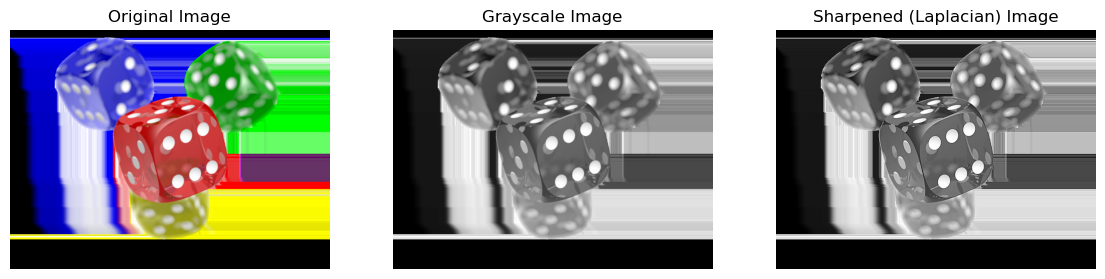

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Download image using requests with headers to avoid 403 error
url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
img_path = 'sample_image.png'

headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
if response.status_code == 200:
    with open(img_path, 'wb') as f:
        f.write(response.content)
else:
    raise Exception(f"Failed to download image. Status code: {response.status_code}")

# Read the image in color
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not found or path is incorrect")

# Convert to grayscale for Laplacian filtering
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define Laplacian kernel (3x3)
laplacian_kernel = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]])

# Apply Laplacian filter using convolution
laplacian = cv2.filter2D(gray, ddepth=cv2.CV_64F, kernel=laplacian_kernel)

# Sharpen by subtracting the Laplacian (edges) from the grayscale image
sharpened_gray = gray - laplacian

# Clip values to 0-255 and convert to uint8
sharpened_gray = np.clip(sharpened_gray, 0, 255).astype(np.uint8)

# For visualization: convert original BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display images side by side
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(img_rgb)

plt.subplot(1,3,2)
plt.title('Grayscale Image')
plt.axis('off')
plt.imshow(gray, cmap='gray')

plt.subplot(1,3,3)
plt.title('Sharpened (Laplacian) Image')
plt.axis('off')
plt.imshow(sharpened_gray, cmap='gray')

plt.show()
